# Practice 1: Measurement Model

## Objetives:
1. Estimate the measurement model for Technical Quality(QT), Financial Quality(QF), Customer Service Quality(QS), Satisfaction and Loyalty
2. Estimate convergent validity: AVE and Composite Reliability of the dimensions.
3. Estimate discriminant validity (square root of AVE x correlations).

## Data Preparation

In [1]:
import pandas as pd
import pyreadstat
from pandas.core.interchange.dataframe_protocol import DataFrame

raw_data_df, meta = pyreadstat.read_sav("../data/EXERCICIO_2025.sav")
raw_data_df.head()

,CASO,f1,f2,f3,f4,f5,f6,f7,P1.1_QA,P1.2_QA,...,P7,P14,ltv2,tempo,clsocial,SATIS,LEAL,ATEND,FIN,TEC
0,NaN,1.0,3.0,6.0,1.0,1.0,50.0,18.0,8.0,6.0,...,3.0,2.0,1373.0,61.0,5.0,6.50,6.2,7.2,9.333333,8.50
1,NaN,1.0,1.0,5.0,1.0,1.0,36.0,35.0,8.0,7.0,...,1.0,1.0,1002.0,47.0,5.0,5.50,4.4,6.8,6.666667,8.00
2,NaN,1.0,3.0,5.0,1.0,1.0,72.0,73.0,10.0,10.0,...,2.0,2.0,2097.0,83.0,5.0,7.50,8.0,9.6,10.000000,8.00
3,NaN,1.0,3.0,9.0,1.0,1.0,24.0,27.0,6.0,6.0,...,1.0,2.0,802.0,35.0,4.0,6.25,6.2,6.4,7.666667,6.50
4,NaN,1.0,4.0,9.0,1.0,1.0,72.0,24.0,2.0,5.0,...,2.0,1.0,4835.0,78.0,4.0,5.25,4.4,4.4,5.666667,5.75


In [2]:
columns_to_filter = [
    'P1.1_QA', 'P1.2_QA', 'P1.3_QA', 'P1.4_QA', 'P1.5_QA', 'P1.15_QA', 'P1.16_QA', 'P1.17_QA',
    'P1.6_QC', 'P1.7_QC', 'P1.8_QC', 'P1.9_QC',
    'P1.10_QT', 'P1.11_QT', 'P1.12_QT', 'P1.13_QT', 'P1.14_QT',
    'P3.1_S', 'P3.2_S', 'P3.3_S', 'P3.4_S',
    'P6.1_L', 'P6.2_L', 'P6.3_L', 'P6.4_L', 'P6.5_L', 'P6.6_L'
]

clean_df = raw_data_df[columns_to_filter].copy()

clean_df.rename(columns=lambda c: c.replace('.', '_'), inplace=True)
clean_df.rename(columns=lambda c: c.replace('C', 'F'), inplace=True)
clean_df.rename(columns=lambda c: c.replace('A', 'S'), inplace=True)
print(raw_data_df.shape)
print(clean_df.shape)
print(clean_df.isnull().sum())

(493, 45)
(493, 27)
P1_1_QS     0
P1_2_QS     0
P1_3_QS     0
P1_4_QS     0
P1_5_QS     0
P1_15_QS    0
P1_16_QS    0
P1_17_QS    0
P1_6_QF     0
P1_7_QF     0
P1_8_QF     0
P1_9_QF     0
P1_10_QT    0
P1_11_QT    0
P1_12_QT    0
P1_13_QT    0
P1_14_QT    0
P3_1_S      0
P3_2_S      0
P3_3_S      0
P3_4_S      0
P6_1_L      0
P6_2_L      0
P6_3_L      0
P6_4_L      0
P6_5_L      0
P6_6_L      0
dtype: int64


## Normality check

### Univariate Normality

Skewness between -2 and +2 (George & Mallery (2010))

Excess Kurtosis between -7 and +7 (West, Finch, & Curran (1995))

In [3]:
from scipy.stats import skew, kurtosis
import pandas as pd

normality_results = []

for column in clean_df.columns:
    data = clean_df[column].dropna()
    skewness = skew(data)
    excess_kurtosis = kurtosis(data, fisher=True)
    normality_results.append({
        'Variable': column,
        'Skewness': skewness,
        'Excess_Kurtosis': excess_kurtosis
    })

normality_df = pd.DataFrame(normality_results)
normality_df

,Variable,Skewness,Excess_Kurtosis
0,P1_1_QS,-0.556369,-0.121009
1,P1_2_QS,-0.541955,0.018259
2,P1_3_QS,-0.531412,0.112580
3,P1_4_QS,-0.257074,-0.868357
4,P1_5_QS,-0.354785,-0.628781
5,P1_15_QS,-0.379107,-0.067594
6,P1_16_QS,-0.426753,-0.166406
7,P1_17_QS,-0.659882,0.806470
8,P1_6_QF,-1.019583,1.334556
9,P1_7_QF,-0.960815,0.685479


### Multivariate normality

In [4]:
from pingouin import multivariate_normality

result = multivariate_normality(clean_df, alpha=0.05)
result

HZResults(hz=np.float64(1.054024583962217), pval=np.float64(0.0), normal=False)

Given the observed violation of multivariate normality and considering the available estimation methods in semopy, the MLW estimator (Maximum Likelihood with Wishart correction) was retained for this analysis. This decision was made to maintain compatibility with the class exercise requirements, as the original analysis conducted in AMOS (which also uses a covariance-based Maximum Likelihood estimation) served as the reference point for this study.

Standard errors were calculated using semopy's `se_robust=True` option,
which provides robust (sandwich-adjusted) standard errors to partially compensate for the effects of non-normality.
However, it is important to note that semopy does not produce robust fit indices (robust CFI or robust RMSEA).
If the data violates multivariate normality,
and robust fit indices or more advanced corrections (MLR or bootstrapping) are required,
it is recommended to use another lib/software.

## Iter-item correlation
$r_{ij} < 0.85$

In [5]:
inter_item_correlation_df = clean_df.corr(method='pearson')
inter_item_correlation_df

,P1_1_QS,P1_2_QS,P1_3_QS,P1_4_QS,P1_5_QS,P1_15_QS,P1_16_QS,P1_17_QS,P1_6_QF,P1_7_QF,...,P3_1_S,P3_2_S,P3_3_S,P3_4_S,P6_1_L,P6_2_L,P6_3_L,P6_4_L,P6_5_L,P6_6_L
P1_1_QS,1.000000,0.661332,0.534278,0.602859,0.658811,0.434899,0.451215,0.406042,0.245193,0.238494,...,0.504339,0.460923,0.516630,0.541975,0.411626,0.546501,0.232295,0.419154,-0.286466,0.504892
P1_2_QS,0.661332,1.000000,0.643198,0.499956,0.522221,0.431816,0.476055,0.437149,0.276239,0.303714,...,0.458283,0.426811,0.472391,0.459261,0.407405,0.472748,0.241088,0.374804,-0.259950,0.444530
P1_3_QS,0.534278,0.643198,1.000000,0.459883,0.509889,0.425414,0.423210,0.348214,0.279875,0.227986,...,0.411795,0.420600,0.457953,0.402426,0.340863,0.400209,0.204831,0.321446,-0.224546,0.351189
P1_4_QS,0.602859,0.499956,0.459883,1.000000,0.735618,0.480423,0.454022,0.407318,0.310402,0.241774,...,0.425936,0.387925,0.431152,0.430193,0.374021,0.477627,0.211195,0.328765,-0.280019,0.448584
P1_5_QS,0.658811,0.522221,0.509889,0.735618,1.000000,0.467172,0.462640,0.417769,0.273472,0.275913,...,0.444246,0.408447,0.462307,0.431168,0.378051,0.513961,0.232421,0.350950,-0.239289,0.467520
P1_15_QS,0.434899,0.431816,0.425414,0.480423,0.467172,1.000000,0.720676,0.546041,0.381422,0.399804,...,0.471246,0.415454,0.466169,0.469777,0.370595,0.508428,0.205883,0.367906,-0.225572,0.474790
P1_16_QS,0.451215,0.476055,0.423210,0.454022,0.462640,0.720676,1.000000,0.685295,0.284075,0.278093,...,0.474449,0.420365,0.489765,0.517402,0.453312,0.529587,0.307141,0.434008,-0.247138,0.529088
P1_17_QS,0.406042,0.437149,0.348214,0.407318,0.417769,0.546041,0.685295,1.000000,0.334516,0.326088,...,0.450484,0.417974,0.454772,0.495591,0.514650,0.538750,0.299427,0.467174,-0.270980,0.534900
P1_6_QF,0.245193,0.276239,0.279875,0.310402,0.273472,0.381422,0.284075,0.334516,1.000000,0.580844,...,0.346668,0.292205,0.311507,0.312191,0.280962,0.294353,0.093079,0.270094,-0.169266,0.259211
P1_7_QF,0.238494,0.303714,0.227986,0.241774,0.275913,0.399804,0.278093,0.326088,0.580844,1.000000,...,0.409060,0.326319,0.357910,0.361471,0.277807,0.321319,0.105576,0.269174,-0.173221,0.324997


## Unrefined Model

### Modeling
Customer Service Quality = QS

Financial Quality = QF

Technical Quality = QT

In [6]:
from semopy import Model

# All Items
# QA =~ P1_1_QA + P1_2_QA + P1_3_QA + P1_4_QA + P1_5_QA + P1_15_QA + P1_16_QA + P1_17_QA
# QF =~ P1_6_QF + P1_7_QF + P1_8_QF + P1_9_QF
# QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT + P1_14_QT
# S =~ P3_1_S + P3_2_S + P3_3_S + P3_4_S
# L =~ P6_1_L + P6_2_L + P6_3_L + P6_4_L + P6_5_L + P6_6_L

unrefined_model_description = """
QS =~ P1_1_QS + P1_2_QS + P1_3_QS + P1_4_QS + P1_5_QS + P1_15_QS + P1_16_QS + P1_17_QS
QF =~ P1_6_QF + P1_7_QF + P1_8_QF + P1_9_QF
QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT + P1_14_QT
S =~ P3_1_S + P3_2_S + P3_3_S + P3_4_S
L =~ P6_1_L + P6_2_L + P6_3_L + P6_4_L + P6_5_L + P6_6_L

QS ~~ QF
QS ~~ QT
QS ~~ S
QS ~~ L
QF ~~ QT
QF ~~ S
QF ~~ L
QT ~~ S
QT ~~ L
S ~~ L
"""

unrefined_model = Model(unrefined_model_description)
print(unrefined_model.fit(clean_df))

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 3.069
Number of iterations: 60
Params: 0.903 0.765 1.135 1.109 0.892 0.925 0.726 1.264 1.359 0.895 1.181 1.019 0.994 0.910 0.868 1.049 1.051 1.350 0.733 0.961 -0.761 1.349 1.119 1.301 1.715 1.497 2.383 0.982 0.989 0.829 1.305 1.185 1.097 2.110 1.422 2.399 1.796 2.378 0.901 1.037 1.529 2.216 1.912 1.773 1.541 1.748 1.748 1.853 2.777 2.244 1.696 1.773 2.826 2.994 0.698 0.665 0.495 0.856 1.089 0.610 2.687 0.917 2.612 0.678


### Model Fit

$\chi^{2} / df < 5$

CFI, GFI, TLI > 0.9

RMSEA < 0,08

In [7]:
from semopy import calc_stats

unrefined_model_stats = calc_stats(unrefined_model)
unrefined_model_stats.T.loc[unrefined_model_stats.T.index.isin(['CFI', 'GFI', 'TLI', 'RMSEA'])]

,Value
CFI,0.865810
GFI,0.837069
TLI,0.849998
RMSEA,0.088098


In [8]:
print(f"chi squared/degrees of freedom: {(unrefined_model_stats['chi2'] / unrefined_model_stats['DoF']).item():.6f}")

chi squared/degrees of freedom: 4.818515


### Parameter Estimates
$\lambda \geq 0.5$ -> acceptable

$\lambda \geq 0.7$ -> ideal

In [9]:
raw_estimates_df = (
    unrefined_model.inspect(std_est=True)
         .query("op == '~' and lval.str.startswith('P')", engine='python')
)
raw_estimates_df["R^2"] = raw_estimates_df["Est. Std"].apply(lambda x: x ** 2)
unrefined_item_estimates_df = (
    raw_estimates_df
    .loc[:, ['lval','rval', 'Est. Std', 'R^2','p-value']]
    .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda',
        'p-value': 'p-value'
    })
    .sort_values(by='lambda')
)
unrefined_item_estimates_df

,Item,Factor,lambda,R^2,p-value
25,P6_5_L,L,-0.533670,0.284804,0.0
11,P1_9_QF,QF,0.508617,0.258691,0.0
23,P6_3_L,L,0.513973,0.264168,0.0
2,P1_3_QS,QS,0.655097,0.429152,0.0
8,P1_6_QF,QF,0.659501,0.434941,-
16,P1_14_QT,QT,0.664187,0.441144,0.0
7,P1_17_QS,QS,0.670267,0.449257,0.0
10,P1_8_QF,QF,0.678525,0.460396,0.0
12,P1_10_QT,QT,0.685661,0.470131,-
5,P1_15_QS,QS,0.705708,0.498024,0.0


In [10]:
# Low lambda items
unrefined_item_estimates_df.query("`lambda` < 0.7", engine='python')

,Item,Factor,lambda,R^2,p-value
25,P6_5_L,L,-0.533670,0.284804,0.0
11,P1_9_QF,QF,0.508617,0.258691,0.0
23,P6_3_L,L,0.513973,0.264168,0.0
2,P1_3_QS,QS,0.655097,0.429152,0.0
8,P1_6_QF,QF,0.659501,0.434941,-
16,P1_14_QT,QT,0.664187,0.441144,0.0
7,P1_17_QS,QS,0.670267,0.449257,0.0
10,P1_8_QF,QF,0.678525,0.460396,0.0
12,P1_10_QT,QT,0.685661,0.470131,-


### Multicollinearity Check
$|r_{ij}| < 0.85$

In [11]:
correlation_estimates = unrefined_model.inspect(std_est=True)
unrefined_factor_correlation_df = (
    correlation_estimates
        .query("op == '~~' and lval != rval")
        .loc[:, ['lval','rval', 'Est. Std', 'Estimate']]
        .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda'
    })

)

unrefined_factor_correlation_df

,Item,Factor,lambda,Estimate
27,QS,QF,0.634529,1.118951
28,QS,QT,0.580412,1.301399
29,QS,S,0.717236,1.714681
30,QS,L,0.723525,1.496634
32,QF,QT,0.591792,0.982082
33,QF,S,0.558852,0.988833
34,QF,L,0.541785,0.829457
36,QT,S,0.526908,1.185428
37,QT,L,0.563334,1.096596
39,S,L,0.685244,1.422242


## Refined Model

### Modeling

In [12]:
model_description = """
QS =~ P1_1_QS + P1_2_QS + P1_4_QS + P1_5_QS + P1_16_QS
QF =~ P1_6_QF + P1_7_QF + P1_8_QF
QT =~ P1_10_QT + P1_11_QT + P1_12_QT + P1_13_QT
S =~ P3_1_S + P3_2_S + P3_3_S + P3_4_S
L =~ P6_1_L + P6_2_L + P6_3_L + P6_4_L

QS ~~ QF
QS ~~ QT
QS ~~ S
QS ~~ L
QF ~~ QT
QF ~~ S
QF ~~ L
QT ~~ S
QT ~~ L
S ~~ L
"""

model = Model(model_description)
print(model.fit(clean_df))

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.112
Number of iterations: 48
Params: 0.834 1.128 1.111 0.729 1.426 1.272 1.217 1.023 0.984 0.867 1.047 1.046 1.135 0.685 0.950 0.927 1.156 1.743 1.557 2.751 0.843 0.931 0.779 1.313 1.137 1.116 2.091 1.461 2.408 2.126 2.400 0.751 1.038 1.591 2.349 1.377 1.775 2.349 1.780 1.686 1.187 3.112 0.688 0.664 0.496 0.869 0.761 1.145 2.655 0.657


After analyzing the model fit statistics and seeing that cutoff criteria were not met, through multiple iterations,
items P1_3_QS, P1_15_QS, P1_17_QS, P1_9_QF,
P1_14_QT and P6_5_L were removed from the model since they had the lowest standardized factor loadings and $R^2$

### Model Fit
$\chi^{2} / df < 5$

CFI, GFI, TLI > 0.9

RMSEA < 0,08

In [13]:
from semopy import calc_stats

refined_model_stats = calc_stats(model)
refined_model_stats.T.loc[refined_model_stats.T.index.isin(['CFI', 'GFI', 'TLI', 'RMSEA'])]

,Value
CFI,0.937560
GFI,0.914444
TLI,0.925852
RMSEA,0.070231


In [14]:
print(f"chi squared/degrees of freedom: {(refined_model_stats['chi2'] / refined_model_stats['DoF']).item():.6f}")

chi squared/degrees of freedom: 3.426756


### Parameter Estimates
$\lambda \geq 0.5$ -> acceptable

$\lambda \geq 0.7$ -> ideal

In [15]:
raw_item_estimates = (
    model.inspect(std_est=True)
         .query("op == '~' and lval.str.startswith('P')")
)
refined_item_estimates_df = (
    raw_item_estimates
    .loc[:, ['lval','rval', 'Est. Std','p-value']]
    .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda',
        'p-value': 'p-value'
    })
    .sort_values(by='lambda')
)
refined_item_estimates_df["R^2"] = refined_item_estimates_df["lambda"].apply(lambda x: x ** 2)
refined_item_estimates_df["epsilon"] = refined_item_estimates_df["R^2"].apply(lambda x: 1 - x)
refined_item_estimates_df

,Item,Factor,lambda,p-value,R^2,epsilon
18,P6_3_L,L,0.522512,0.0,0.273019,0.726981
4,P1_16_QS,QS,0.619575,0.0,0.383874,0.616126
7,P1_8_QF,QF,0.636940,0.0,0.405693,0.594307
5,P1_6_QF,QF,0.661699,-,0.437846,0.562154
8,P1_10_QT,QT,0.682313,-,0.465550,0.534450
1,P1_2_QS,QS,0.720268,0.0,0.518786,0.481214
11,P1_13_QT,QT,0.748259,0.0,0.559891,0.440109
2,P1_4_QS,QS,0.773539,0.0,0.598362,0.401638
3,P1_5_QS,QS,0.809975,0.0,0.656059,0.343941
0,P1_1_QS,QS,0.816331,-,0.666396,0.333604


### Model Graph

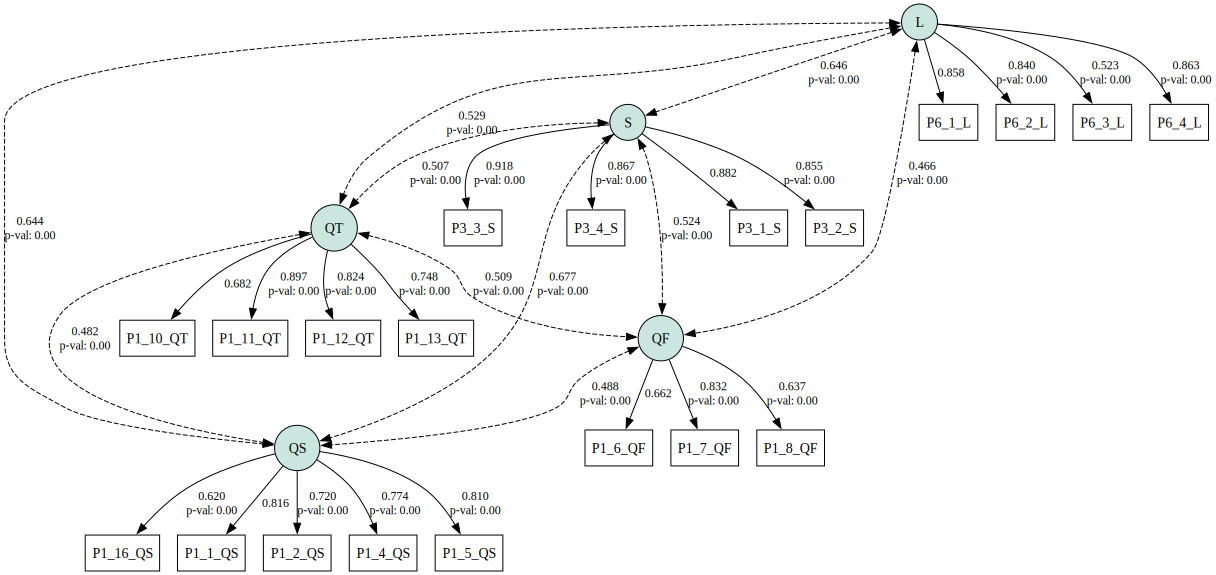

In [16]:
from semopy import semplot
semplot(model, "../practice 1/model.png", std_ests=True, plot_covs=True)

### Multicollinearity Check
$|r_{ij}| < 0.85$

In [17]:
# Extract latent variable covariances
correlation_estimates = model.inspect(std_est=True)
refined_factor_correlation_df = (
    correlation_estimates
        .query("op == '~~' and lval != rval")
        .loc[:, ['lval','rval', 'Est. Std', 'Estimate']]
        .rename(columns={
        'lval': 'Item',
        'rval': 'Factor',
        'Est. Std': 'lambda'
    })

)

refined_factor_correlation_df

,Item,Factor,lambda,Estimate
20,QS,QF,0.487921,0.927350
21,QS,QT,0.482121,1.156313
22,QS,S,0.677185,1.743101
23,QS,L,0.643940,1.557223
25,QF,QT,0.509011,0.843388
26,QF,S,0.523663,0.931211
27,QF,L,0.466218,0.778887
29,QT,S,0.506532,1.136656
30,QT,L,0.529309,1.115889
32,S,L,0.645634,1.460810


## Validity and Reliability Analysis

$R^2 > 0.2$

In [18]:
refined_item_estimates_df

,Item,Factor,lambda,p-value,R^2,epsilon
18,P6_3_L,L,0.522512,0.0,0.273019,0.726981
4,P1_16_QS,QS,0.619575,0.0,0.383874,0.616126
7,P1_8_QF,QF,0.636940,0.0,0.405693,0.594307
5,P1_6_QF,QF,0.661699,-,0.437846,0.562154
8,P1_10_QT,QT,0.682313,-,0.465550,0.534450
1,P1_2_QS,QS,0.720268,0.0,0.518786,0.481214
11,P1_13_QT,QT,0.748259,0.0,0.559891,0.440109
2,P1_4_QS,QS,0.773539,0.0,0.598362,0.401638
3,P1_5_QS,QS,0.809975,0.0,0.656059,0.343941
0,P1_1_QS,QS,0.816331,-,0.666396,0.333604


### Convergent Validity
$AVE \geq 0.5$
#### Average Variance Extracted (AVE)
Simplified formula

$\text{AVE} = \frac{\displaystyle\sum \lambda^{2}}{\displaystyle\sum \lambda^{2} + \sum \epsilon}$

In [19]:
factors = refined_item_estimates_df['Factor'].unique().tolist()
items = refined_item_estimates_df['Item'].unique().tolist()

In [20]:
import numpy as np
AVE = pd.DataFrame()
for factor_name in factors:
    factor_df = refined_item_estimates_df.query(f"Factor == '{factor_name}'").copy()
    factor_AVE = factor_df['R^2'].sum() / (factor_df['R^2'].sum() + factor_df['epsilon'].sum())
    factor_AVE_sqrt = np.sqrt(factor_AVE)
    new_row = pd.DataFrame({'Factor': [factor_name], 'AVE': [factor_AVE], 'sqrt_AVE': [factor_AVE_sqrt]})
    AVE = pd.concat([AVE, new_row], ignore_index=True)
AVE

,Factor,AVE,sqrt_AVE
0,L,0.614938,0.784180
1,QS,0.564695,0.751462
2,QF,0.511936,0.715497
3,QT,0.627114,0.791905
4,S,0.775838,0.880817


### Composite Reliability (CR)
$CR \geq 0.7$

Simplified formula:

$\text{CR} =\frac{\displaystyle\left(\sum \lambda\right)^{2}}{\displaystyle\left(\sum \lambda\right)^{2} + \sum \epsilon}$

In [21]:
CR = pd.DataFrame()
for factor_name in factors:
    factor_df = refined_item_estimates_df.query(f"Factor == '{factor_name}'").copy()
    factor_CR = (factor_df['lambda'].sum())**2 / ((factor_df['lambda'].sum())**2 + factor_df['epsilon'].sum())
    new_row = pd.DataFrame({'Factor': [factor_name], 'CR': [factor_CR]})
    CR = pd.concat([CR, new_row], ignore_index=True)
CR

,Factor,CR
0,L,0.860598
1,QS,0.865329
2,QF,0.756128
3,QT,0.869412
4,S,0.932590


### Cronbach’s Alpha
$\alpha \geq 0.7$

$\alpha = \frac{k}{k - 1} \left(1 - \frac{\sum_{i=1}^{k} \sigma_i^2}{\sigma_T^2}\right)$


$k$ = number of items

$\sigma_i^2$ = variance of item i

$\sigma_T^2$ = variance of the total score (sum of all items)

In [22]:
alpha_df = pd.DataFrame()
model_df = clean_df[items].copy()
for factor_name in factors:
    factor_df = model_df[[col for col in model_df.columns if col.endswith(factor_name)]].copy()

    variances = [np.var(factor_df[col], ddof=1) for col in factor_df.columns]
    total_variance = sum(variances)

    k = len(factor_df.columns)

    total_score_vector = factor_df.sum(axis=1)

    alpha = k / (k - 1) * (1 - (total_variance / np.var(total_score_vector, ddof=1)))

    new_row = pd.DataFrame({'Factor': [factor_name], 'alpha': [alpha], 'k': [k]})
    alpha_df = pd.concat([alpha_df, new_row], ignore_index=True)
alpha_df

,Factor,alpha,k
0,L,0.845394,4
1,QS,0.860397,5
2,QF,0.727035,3
3,QT,0.859802,4
4,S,0.908001,9


### Discriminant Validity
$\sqrt{\text{AVE}}_i > |r_{ij}|$


In [23]:
construct_validity_df: DataFrame = AVE.merge(CR, on='Factor', how='left').merge(alpha_df, on='Factor', how='left')
construct_validity_df

,Factor,AVE,sqrt_AVE,CR,alpha,k
0,L,0.614938,0.784180,0.860598,0.845394,4
1,QS,0.564695,0.751462,0.865329,0.860397,5
2,QF,0.511936,0.715497,0.756128,0.727035,3
3,QT,0.627114,0.791905,0.869412,0.859802,4
4,S,0.775838,0.880817,0.932590,0.908001,9


All cutoff criteria for CR, AVE and Crombach's alpha were met for all constructs

In [24]:
refined_factor_correlation_df

,Item,Factor,lambda,Estimate
20,QS,QF,0.487921,0.927350
21,QS,QT,0.482121,1.156313
22,QS,S,0.677185,1.743101
23,QS,L,0.643940,1.557223
25,QF,QT,0.509011,0.843388
26,QF,S,0.523663,0.931211
27,QF,L,0.466218,0.778887
29,QT,S,0.506532,1.136656
30,QT,L,0.529309,1.115889
32,S,L,0.645634,1.460810


For each construct $\text{i}$,
the square root of its AVE is greater than the absolute value of its correlation with any other construct $\text{j}$.

# Final Analysis

In [25]:
refined_item_estimates_df

,Item,Factor,lambda,p-value,R^2,epsilon
18,P6_3_L,L,0.522512,0.0,0.273019,0.726981
4,P1_16_QS,QS,0.619575,0.0,0.383874,0.616126
7,P1_8_QF,QF,0.636940,0.0,0.405693,0.594307
5,P1_6_QF,QF,0.661699,-,0.437846,0.562154
8,P1_10_QT,QT,0.682313,-,0.465550,0.534450
1,P1_2_QS,QS,0.720268,0.0,0.518786,0.481214
11,P1_13_QT,QT,0.748259,0.0,0.559891,0.440109
2,P1_4_QS,QS,0.773539,0.0,0.598362,0.401638
3,P1_5_QS,QS,0.809975,0.0,0.656059,0.343941
0,P1_1_QS,QS,0.816331,-,0.666396,0.333604


In [26]:
construct_validity_df

,Factor,AVE,sqrt_AVE,CR,alpha,k
0,L,0.614938,0.784180,0.860598,0.845394,4
1,QS,0.564695,0.751462,0.865329,0.860397,5
2,QF,0.511936,0.715497,0.756128,0.727035,3
3,QT,0.627114,0.791905,0.869412,0.859802,4
4,S,0.775838,0.880817,0.932590,0.908001,9


The final measurement model demonstrated strong psychometric adequacy, satisfying both convergent and discriminant validity requirements. Convergent validity was evidenced by AVE values surpassing the recommended threshold of 0.50 for all latent constructs, with AVE ranging from 0.512 for Financial Quality (QF) to 0.775 for Satisfaction (S). These values confirm that each construct explains more than half of the variance in its observed indicators (Hair et al., 2010). Additionally, Composite Reliability (CR) values exceeded the 0.70 benchmark across all constructs, ranging from 0.756 (QF) to 0.933 (S), indicating satisfactory internal consistency. Cronbach’s alpha coefficients further reinforced this, with all constructs demonstrating reliability levels above 0.70.

Regarding discriminant validity, the square root of the AVE for each latent construct was compared against its inter-construct correlations, following the Fornell-Larcker (1981) criterion. Results indicate that for every construct pair, the square root of AVE was consistently higher than the corresponding latent correlation. For example, the square root of AVE for Satisfaction (S) was 0.881, exceeding its highest correlation with Loyalty (L), which was 0.686. Similarly, for Loyalty (L), the square root of AVE (0.798) surpassed its strongest correlation with Satisfaction (0.686). This pattern was maintained across all constructs, thereby providing robust evidence of discriminant validity. Taken together, these results substantiate the adequacy of the final measurement model in terms of both construct validity and reliability.